# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

Você recebeu um dado chamado 'Electric_Production.csv'. Atribua-o a um dataframe df.

In [22]:
import pandas as pd

df=pd.read_csv('Electric_Production.csv')

df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


## 1. A partir de df, use os modelos abaixo para fazer previsões para os 30 períodos futuros.

#### a. ARIMA (2,0,0)

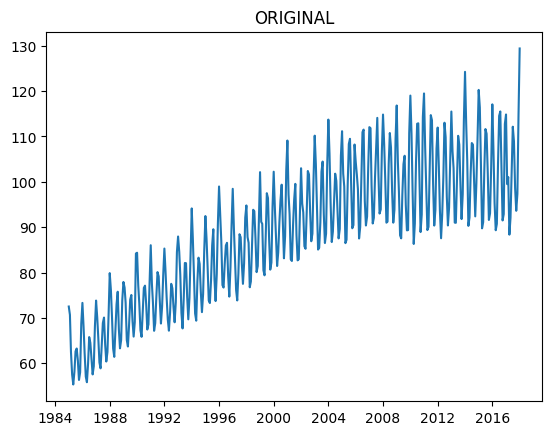

In [23]:
import matplotlib.pyplot as plt

ser=pd.Series(df['IPG2211A2N'].values,index=pd.to_datetime(df['DATE']))


plt.title('ORIGINAL')
plt.plot(ser)

In [30]:
import statsmodels.api as sm

modelo_ar=sm.tsa.arima.ARIMA(ser.values,order=(2,0,0))
resultado=modelo_ar.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1316.902
Date:                Sat, 22 Jun 2024   AIC                           2641.803
Time:                        11:05:36   BIC                           2657.739
Sample:                             0   HQIC                          2648.116
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.0667      1.967     45.276      0.000      85.211      92.922
ar.L1          1.2874      0.053     24.503      0.000       1.184       1.390
ar.L2         -0.4709      0.056     -8.401      0.0

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_33168/2930421546.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  previsao=pd.Series(data=previsao,index=pd.date_range(start=proximaData,freq="M",periods=len(previsao)))


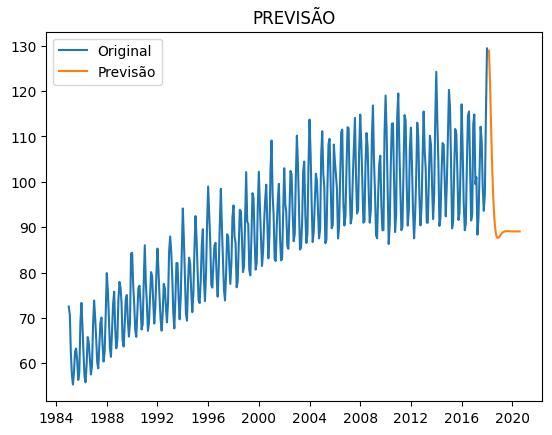

In [39]:
# faça a previsão para os próximos 30 passos
previsao=resultado.predict(start=len(ser),end=len(ser)+30-1)
proximaData=ser.index[-1]+pd.DateOffset(months=1)
# crie um objeto do tipo Series com a previsão iniciando a data proximaData como index e incrementando de mês em mês
previsao=pd.Series(data=previsao,index=pd.date_range(start=proximaData,freq="M",periods=len(previsao)))

previsao


plt.title('PREVISÃO')
plt.plot(ser, label='Original')
plt.plot(previsao, label='Previsão')
plt.legend()
plt.show()

#### b. ARIMA (2,0,1)

#### c. ARIMA (2,2,1)

#### d. ARIMA (8,2,1)

#### e. Criei um gráfico com todas as previsões acima.

#### f. Entre estes, qual é o melhor? Utilize a métrica AIC.

#### g. Use o auto-arima e apresente o melhor modelo encontrado. 